#Seatwork 11.1 Exploratory Data Analysis for Machine Learning


**Name:** Xander Sam E. Galapia

**Section:** CPE22S3

In [74]:
!pip install hvplot


In [2]:
pip install ucimlrepo


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
Xx = wine.data.features
yy = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [6]:
AutoMobile = pd.concat([X,y], axis = 1)
AutoMobile

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0      2.68  3.47        mpfi          130  ...        88.6           front   
1      2.68  3.47        mpfi          130  ...        88.6           front   
2      3.47  2.68        mpfi          152  ...        94.5           front   
3      3.40  3.19        mpfi          109  ...        99.8           front   
4      3.40  3.19        mpfi          136  ...        99.4           front   
..      ...   ...         ...          ...  ...         ...             ...   
200    3.15  3.78        mpfi          141  ...       109.1           front   
201    3.15  3.78        mpfi          141  ...       109.1           front   
202    2.87  3.58        mpfi          173  ...       109.1           front   
203    3.40  3.01         idi          145  ...       109.1           front   
204    3.15  3.78        mpfi          141  ...       109.1           front   

     drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \
0             rwd  convertible           2.0         std        gas   
1             rwd  convertible           2.0         std        gas   
2             rwd    hatchback           2.0         std        gas   
3             fwd        sedan           4.0         std        gas   
4             4wd        sedan           4.0         std        gas   
..            ...          ...           ...         ...        ...   
200           rwd        sedan           4.0         std        gas   
201           rwd        sedan           4.0       turbo        gas   
202           rwd        sedan           4.0         std        gas   
203           rwd        sedan           4.0       turbo     diesel   
204           rwd        sedan           4.0       turbo        gas   

            make normalized-losses symboling  
0    alfa-romero               NaN         3  
1    alfa-romero               NaN         3  
2    alfa-romero               NaN         1  
3           audi             164.0         2  
4           audi             164.0         2  
..           ...               ...       ...  
200        volvo              95.0        -1  
201        volvo              95.0        -1  
202        volvo              95.0        -1  
203        volvo              95.0        -1  
204        volvo              95.0        -1  

[205 rows x 26 columns]

In [7]:
Wine = pd.concat([Xx, yy], axis = 1)
Wine

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

###Finding where and how many missing values are there in all columns of AutoMobile

In [8]:
AutoMobile.isna().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [9]:
AutoMobile.describe()

price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count    201.000000   205.000000  205.000000   203.000000  203.000000   
mean   13207.129353    30.751220   25.219512  5125.369458  104.256158   
std     7947.066342     6.886443    6.542142   479.334560   39.714369   
min     5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%     7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%    10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%    16500.000000    34.000000   30.000000  5500.000000  116.000000   
max    45400.000000    54.000000   49.000000  6600.000000  288.000000   

       compression-ratio      stroke        bore  engine-size  \
count         205.000000  201.000000  201.000000   205.000000   
mean           10.142537    3.255423    3.329751   126.907317   
std             3.972040    0.316717    0.273539    41.642693   
min             7.000000    2.070000    2.540000    61.000000   
25%             8.600000    3.110000    3.150000    97.000000   
50%             9.000000    3.290000    3.310000   120.000000   
75%             9.400000    3.410000    3.590000   141.000000   
max            23.000000    4.170000    3.940000   326.000000   

       num-of-cylinders  curb-weight      height       width      length  \
count        205.000000   205.000000  205.000000  205.000000  205.000000   
mean           4.380488  2555.565854   53.724878   65.907805  174.049268   
std            1.080854   520.680204    2.443522    2.145204   12.337289   
min            2.000000  1488.000000   47.800000   60.300000  141.100000   
25%            4.000000  2145.000000   52.000000   64.100000  166.300000   
50%            4.000000  2414.000000   54.100000   65.500000  173.200000   
75%            4.000000  2935.000000   55.500000   66.900000  183.100000   
max           12.000000  4066.000000   59.800000   72.300000  208.100000   

       wheel-base  num-of-doors  normalized-losses   symboling  
count  205.000000    203.000000         164.000000  205.000000  
mean    98.756585      3.123153         122.000000    0.834146  
std      6.021776      0.994841          35.442168    1.245307  
min     86.600000      2.000000          65.000000   -2.000000  
25%     94.500000      2.000000          94.000000    0.000000  
50%     97.000000      4.000000         115.000000    1.000000  
75%    102.400000      4.000000         150.000000    2.000000  
max    120.900000      4.000000         256.000000    3.000000

###As there is a missing values in some rows in the columns we will use the mean of their specific column and add its mean to the values with missing value

In [10]:
Missing_val = ['price', 'peak-rpm','horsepower','stroke','bore','num-of-doors','normalized-losses']

In [11]:
for col in Missing_val:
  AutoMobile[col].fillna(AutoMobile[col].mean(), inplace=True)

##Recheking if there is null/missing values

In [12]:
AutoMobile.isna().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

###Checking the datatypes

In [13]:
AutoMobile.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

###Removing the columns that have object datatype

In [14]:
AutoMob = AutoMobile.drop(['fuel-system',
                   'engine-type',
                   'engine-location',
                   'drive-wheels',
                   'body-style',
                   'aspiration',
                   'fuel-type',
                   'make'], axis = 1)

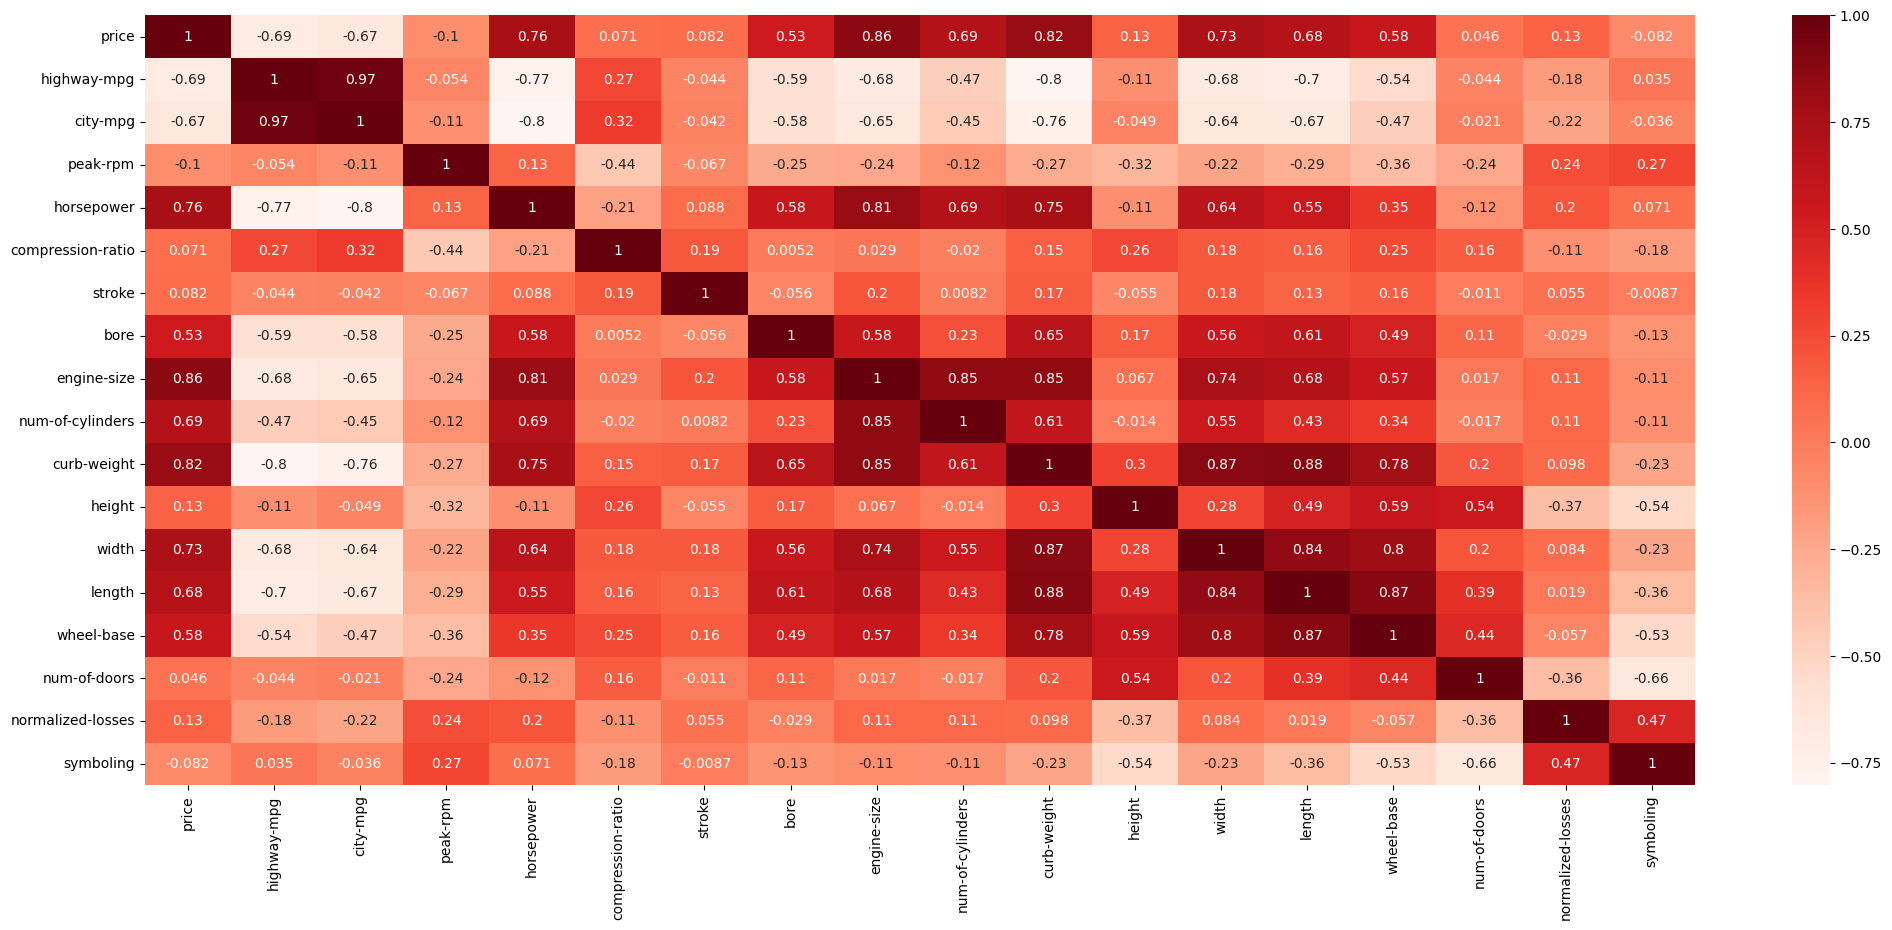

In [15]:
plt.figure(figsize =(25,10))
ax = sns.heatmap(AutoMob.corr(), annot = True, cmap = 'Reds')

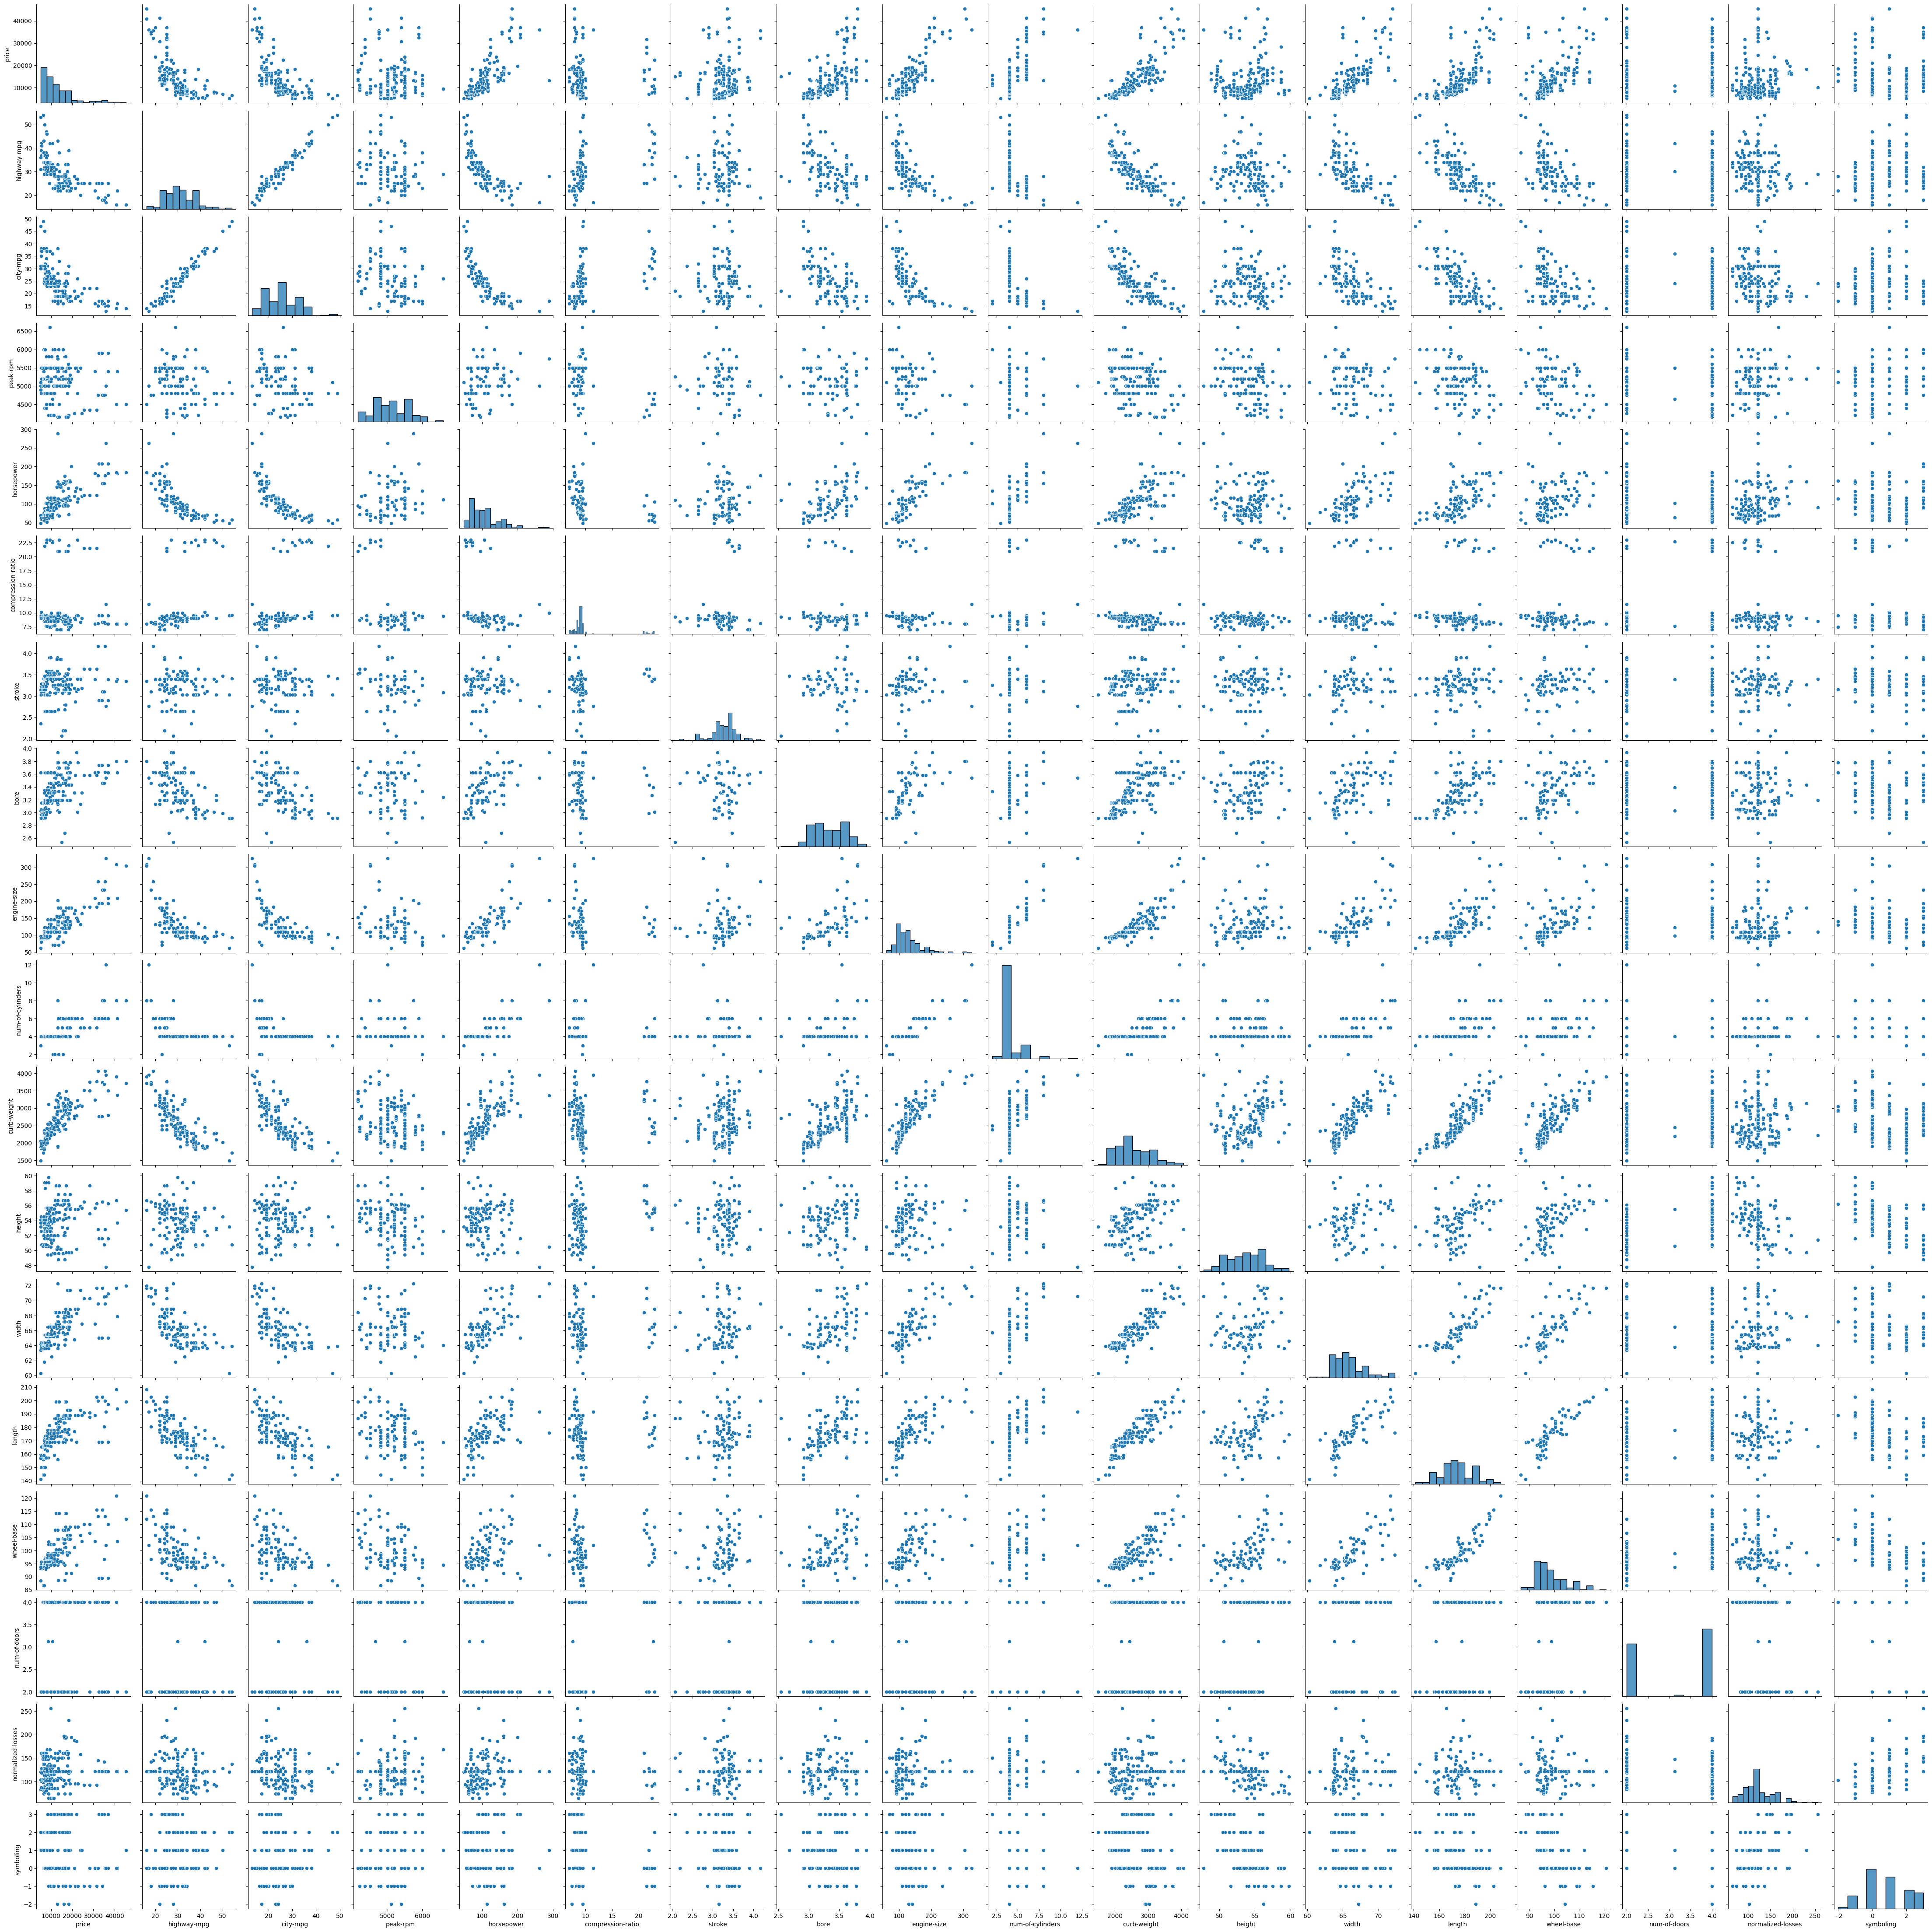

In [16]:
sns.pairplot(AutoMob)

###We will use city-mpg and the highway-mpg since it have the highest correlation and we can see that if city-mpg increases the highway-mpg also increases since it both cover distance

<Axes: xlabel='city-mpg', ylabel='highway-mpg'>

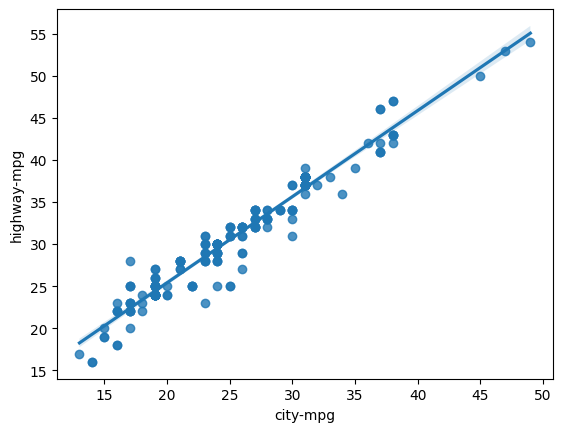

In [17]:
sns.regplot(x = AutoMob['city-mpg'], y = AutoMob['highway-mpg'])

In [18]:
AutoMob['highway-mpg'].corr(AutoMob['city-mpg'])

0.9713370423425061

###We will be using another sample

<Axes: xlabel='price', ylabel='engine-size'>

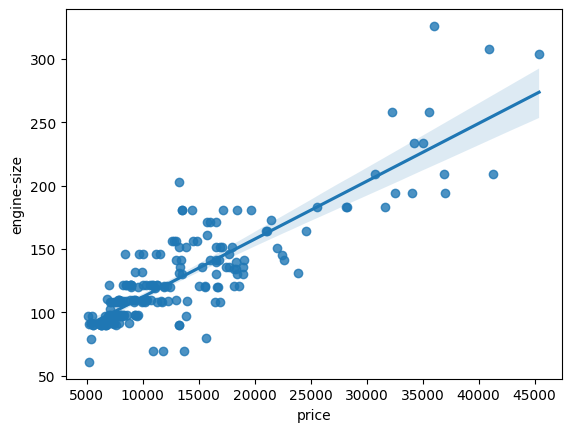

In [19]:
sns.regplot(x = AutoMob['price'], y = AutoMob['engine-size'])

In [20]:
AutoMob['price'].corr(AutoMob['engine-size'])

0.8617522436859719

##Using city-mpg and horsepower we can see that both have low correlation where if horsepower increases the city-mpg doesn't increase

<Axes: xlabel='city-mpg', ylabel='horsepower'>

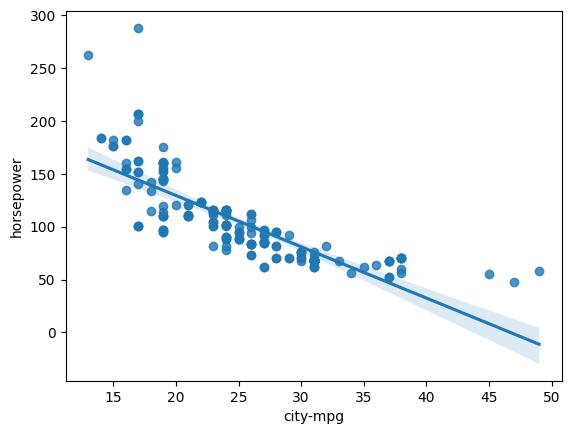

In [21]:
sns.regplot(x = AutoMob['city-mpg'], y = AutoMob['horsepower'])

In [22]:
AutoMob['horsepower'].corr(AutoMob['city-mpg'])

-0.8031621465372332

#**Wine**

In [23]:
Wine

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

In [24]:
Wine.describe()

Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  0D280_0D315_of_diluted_wines      Proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

###As there is no missing value we don't need to use the mean

In [25]:
Wine.isna().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

###As there is no object datatype we won't be needing to delete columns

In [26]:
Wine.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
class                             int64
dtype: object

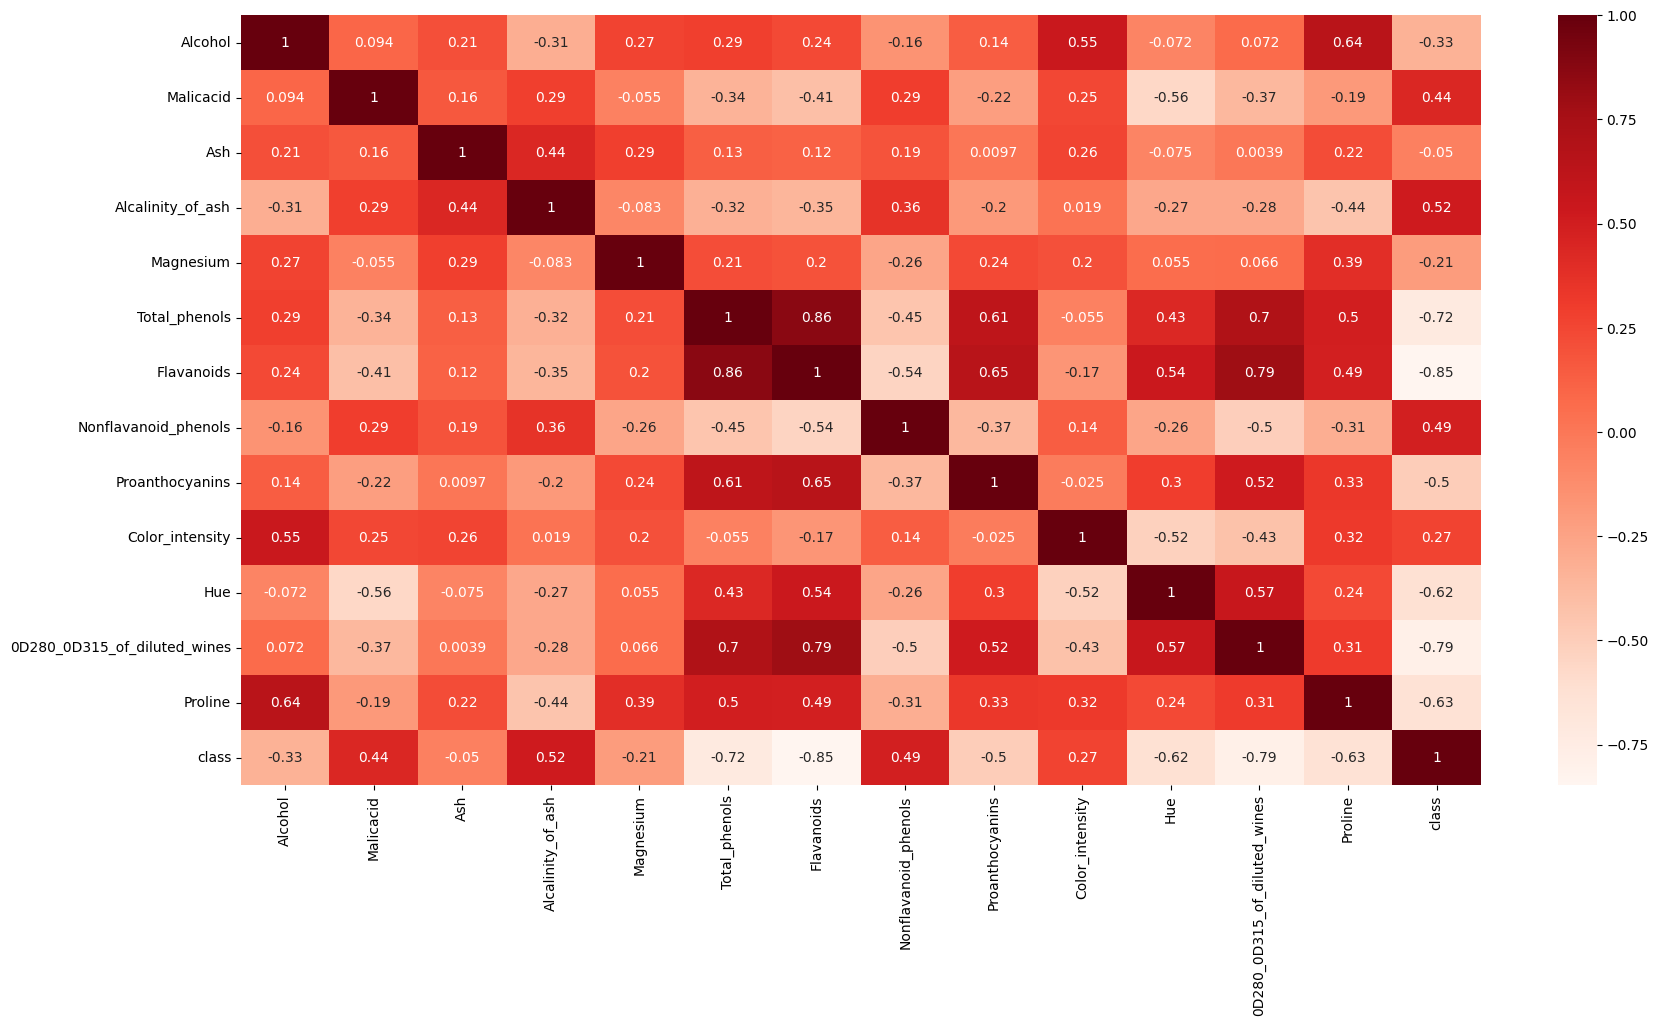

In [27]:
plt.figure(figsize =(20,10))
ax = sns.heatmap(Wine.corr(), annot = True, cmap = 'Reds')

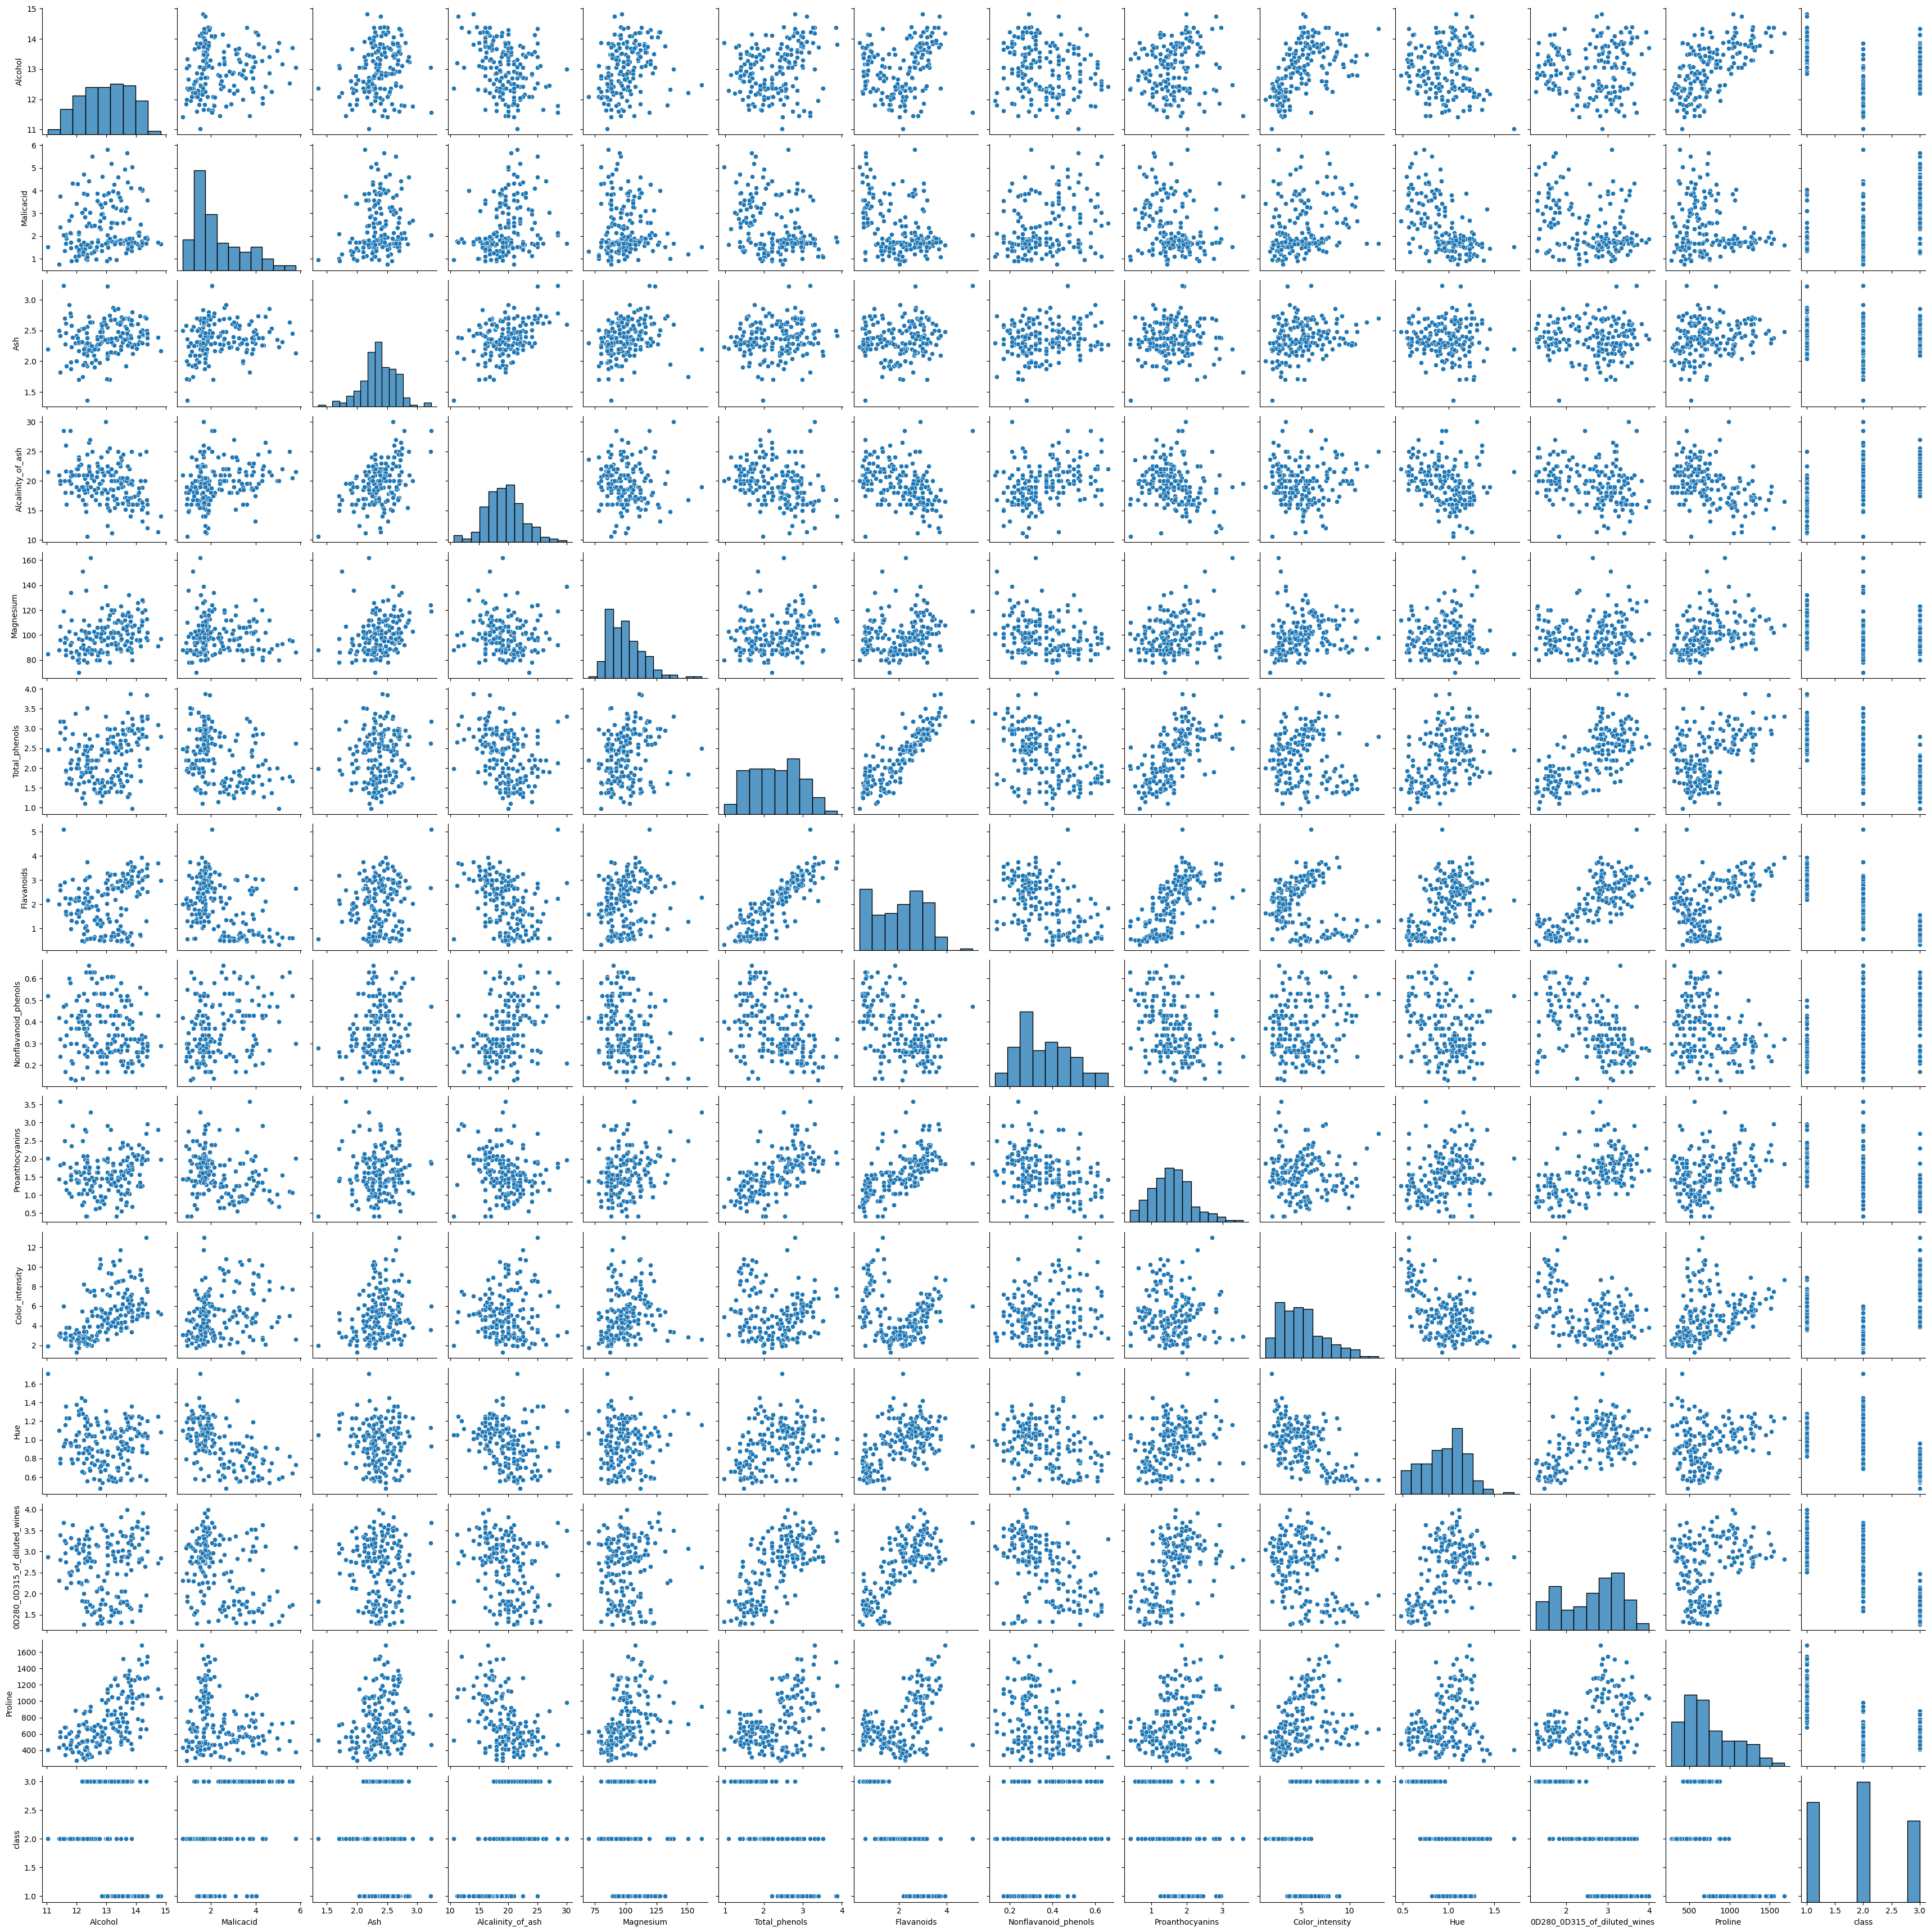

In [28]:
sns.pairplot(Wine)

In [29]:
Wine['Flavanoids'].corr(Wine['Total_phenols'])

0.8645635000951151

###As there is a high colleration between the 2 we can see that if one increases the other also increases

<Axes: xlabel='Flavanoids', ylabel='Total_phenols'>

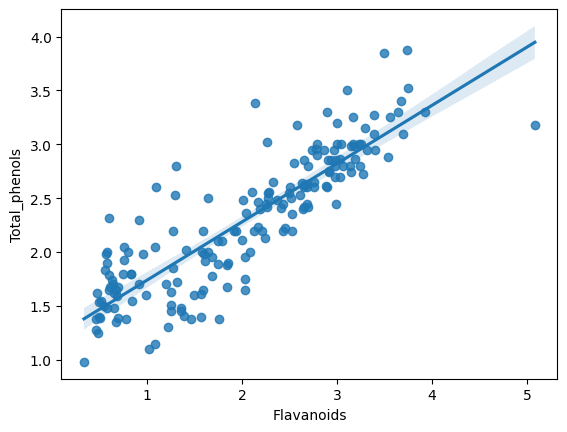

In [30]:
sns.regplot(x = Wine['Flavanoids'], y = Wine['Total_phenols'])

<Axes: xlabel='Total_phenols', ylabel='Flavanoids'>

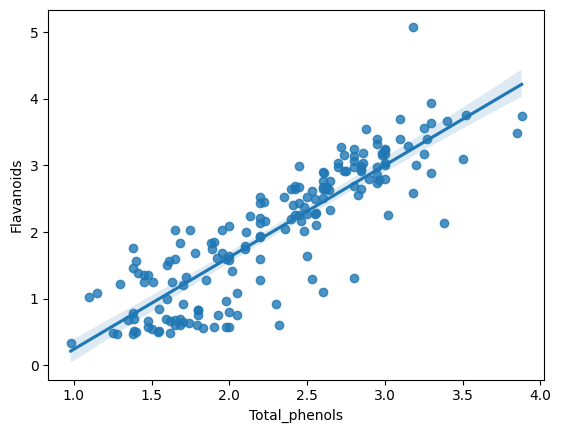

In [33]:
sns.regplot(y = Wine['Flavanoids'], x = Wine['Total_phenols'])

###As the correlation between the Flavanoids and Class, Hue and Malacacid is Negative/low it shows that the other doesn't increase if one increases

In [31]:
Wine['Flavanoids'].corr(Wine['class'])

-0.8474975401417579

<Axes: xlabel='class', ylabel='Flavanoids'>

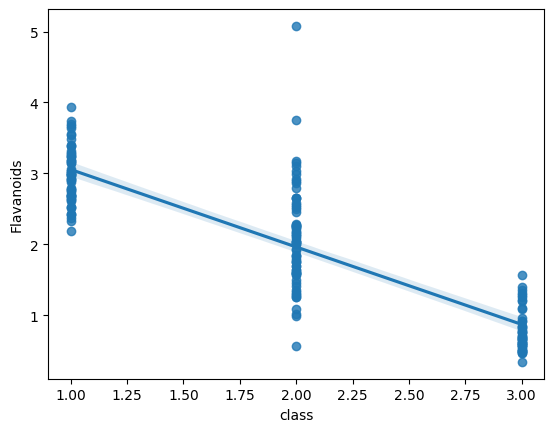

In [32]:
sns.regplot(x = Wine['class'], y = Wine['Flavanoids'])

In [34]:
Wine['Hue'].corr(Wine['Malicacid'])

-0.5612956886649448

<Axes: xlabel='Hue', ylabel='Malicacid'>

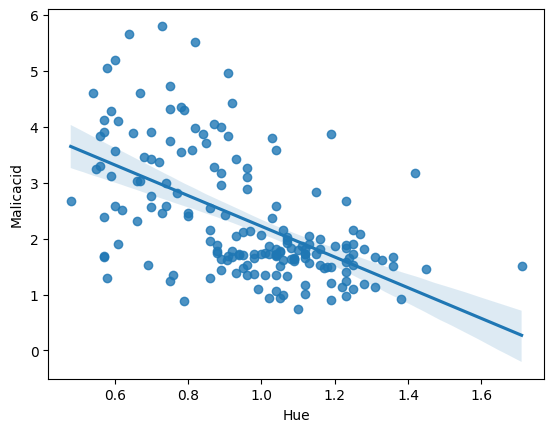

In [35]:
sns.regplot(x = Wine['Hue'], y = Wine['Malicacid'])

<Axes: xlabel='Malicacid', ylabel='Hue'>

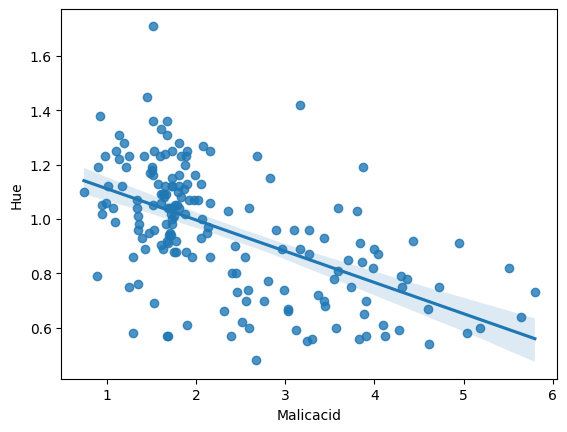

In [36]:
sns.regplot(y = Wine['Hue'], x = Wine['Malicacid'])